###**1. Problem Framing-**
Business Context: Telecom companies lose revenue due to customer churn.

Objective : This project builds a predictive model to identify high-risk customers and understand key churn drivers to support retention strategies.


### **2. Import libraries-**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, accuracy_score

### **3. Loading Data -**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving telecom_churn_dataset_utf8.csv to telecom_churn_dataset_utf8 (1).csv


In [3]:
df = pd.read_csv("telecom_churn_dataset_utf8.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,ID1000,Male,1,No,No,26,No,Yes,Fiber optic,No internet service,...,No internet service,No,Yes,No,Month-to-month,Yes,Mailed check,113.58,7044.95,0
1,ID1001,Male,0,Yes,No,65,No,Yes,DSL,Yes,...,No,No internet service,No,No,Month-to-month,No,Electronic check,27.40,2509.68,1
2,ID1002,Female,0,No,Yes,45,Yes,Yes,Fiber optic,No internet service,...,No internet service,No internet service,Yes,No internet service,Two year,Yes,Electronic check,44.82,7898.76,1
3,ID1003,Male,1,No,Yes,28,Yes,No phone service,DSL,No,...,No internet service,No,No internet service,No,Month-to-month,Yes,Mailed check,82.19,2509.54,1
4,ID1004,Male,1,Yes,No,14,Yes,No,DSL,Yes,...,No,Yes,No,Yes,Two year,No,Bank transfer (automatic),111.04,866.48,1


In [5]:
print("Dataset Shape:", df.shape)

Dataset Shape: (150, 21)


In [6]:
df.columns = df.columns.str.strip()

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,ID1000,Male,1,No,No,26,No,Yes,Fiber optic,No internet service,...,No internet service,No,Yes,No,Month-to-month,Yes,Mailed check,113.58,7044.95,0
1,ID1001,Male,0,Yes,No,65,No,Yes,DSL,Yes,...,No,No internet service,No,No,Month-to-month,No,Electronic check,27.40,2509.68,1
2,ID1002,Female,0,No,Yes,45,Yes,Yes,Fiber optic,No internet service,...,No internet service,No internet service,Yes,No internet service,Two year,Yes,Electronic check,44.82,7898.76,1
3,ID1003,Male,1,No,Yes,28,Yes,No phone service,DSL,No,...,No internet service,No,No internet service,No,Month-to-month,Yes,Mailed check,82.19,2509.54,1
4,ID1004,Male,1,Yes,No,14,Yes,No,DSL,Yes,...,No,Yes,No,Yes,Two year,No,Bank transfer (automatic),111.04,866.48,1


In [7]:
print(df['Churn'].unique())

[0 1]


### **4. Basic Data Check**

In [8]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


In [22]:
print(df.info())  # data types, missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            150 non-null    object 
 1   SeniorCitizen     150 non-null    int64  
 2   Partner           150 non-null    object 
 3   Dependents        150 non-null    object 
 4   tenure            150 non-null    int64  
 5   PhoneService      150 non-null    object 
 6   MultipleLines     150 non-null    object 
 7   InternetService   150 non-null    object 
 8   OnlineSecurity    150 non-null    object 
 9   OnlineBackup      150 non-null    object 
 10  DeviceProtection  150 non-null    object 
 11  TechSupport       150 non-null    object 
 12  StreamingTV       150 non-null    object 
 13  StreamingMovies   150 non-null    object 
 14  Contract          150 non-null    object 
 15  PaperlessBilling  150 non-null    object 
 16  PaymentMethod     150 non-null    object 
 1

In [23]:
print(df.describe())  # numeric features overview

       SeniorCitizen      tenure  MonthlyCharges  TotalCharges       Churn
count     150.000000  150.000000      150.000000    150.000000  150.000000
mean        0.606667   32.566667       74.029800   4068.698867    0.493333
std         0.490126   20.032328       29.008782   2221.495232    0.501630
min         0.000000    1.000000       20.090000     52.680000    0.000000
25%         0.000000   14.000000       47.707500   2534.345000    0.000000
50%         1.000000   32.000000       79.060000   4090.935000    0.000000
75%         1.000000   49.750000      100.017500   5969.170000    1.000000
max         1.000000   71.000000      118.810000   7901.680000    1.000000


###**5. Data Cleaning**

In [9]:
#Data Cleaning

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Remove missing values
df.dropna(inplace=True)

# Drop unnecessary column
df.drop(columns=['customerID'], inplace=True)

print("Cleaned Shape:", df.shape)


Cleaned Shape: (150, 20)


In [10]:
# Identifying NULL Values-
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


###**6. Exploratory Data Analysis (Visualization Section)**

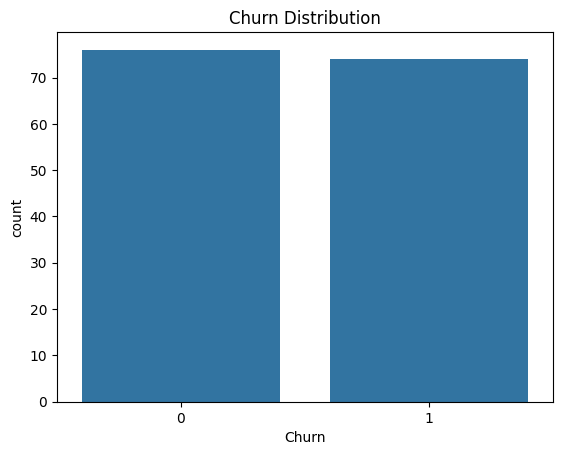

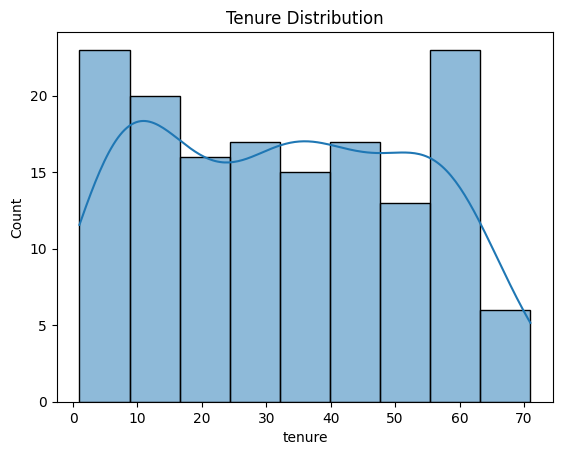

In [12]:
plt.figure()
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

plt.figure()
sns.histplot(df['tenure'], kde=True)
plt.title("Tenure Distribution")
plt.show()

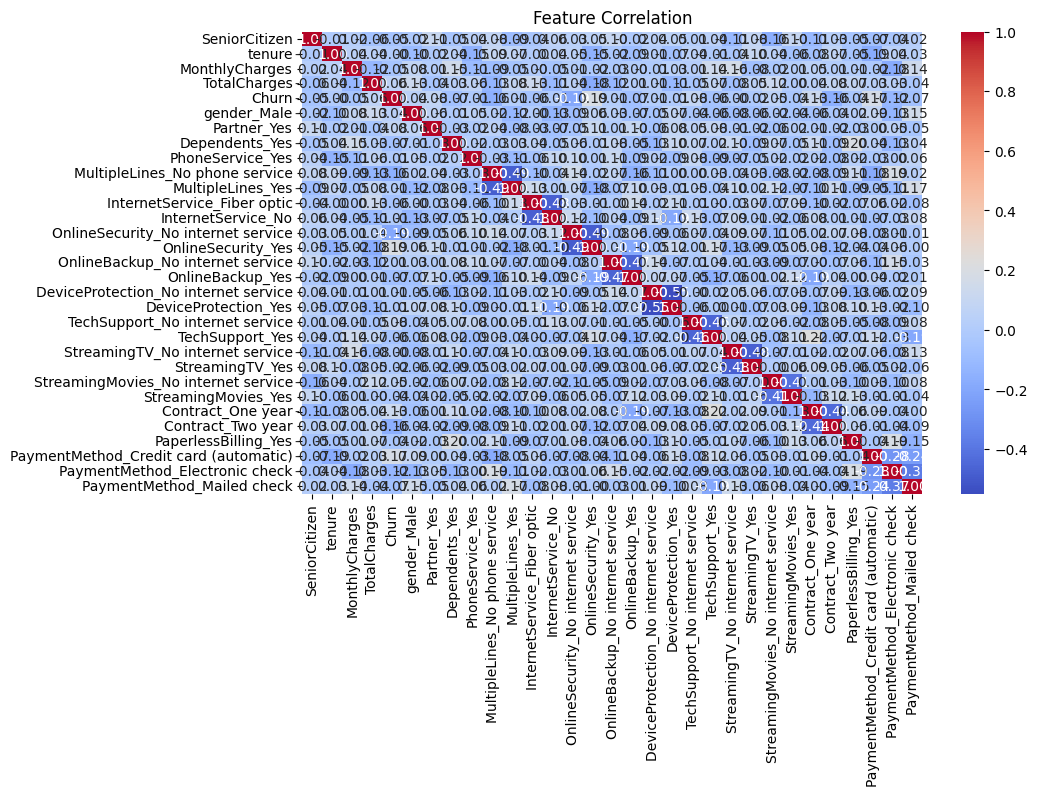

In [25]:
#Feature Correlation Heatmap
plt.figure(figsize=(10,6))
# Create a temporary DataFrame with encoded categorical variables for correlation calculation
df_encoded_for_corr = pd.get_dummies(df, drop_first=True)
sns.heatmap(df_encoded_for_corr.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

### **7. Feature Encoding**

In [13]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X = pd.get_dummies(X, drop_first=True)


###**8. Train-Test split**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

###**9. Processing Pipeline with Class Imbalance Handling**

In [26]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced', random_state=42))  # handles imbalance
])
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced', random_state=42))])

### **10. Model Evaluation**

In [20]:
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.69      0.45      0.55        20
           1       0.35      0.60      0.44        10

    accuracy                           0.50        30
   macro avg       0.52      0.53      0.49        30
weighted avg       0.58      0.50      0.51        30



###**11. Feature Importance**

In [29]:
# Logistic Regression coefficients indicate top features influencing churn
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': pipeline.named_steps['model'].coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)
print("Top Features influencing Churn:")
print(feature_importance.head(10))

Top Features influencing Churn:
                            Feature  Coefficient
29       PaymentMethod_Mailed check    -0.650268
28   PaymentMethod_Electronic check    -0.621336
19                  TechSupport_Yes    -0.485812
13               OnlineSecurity_Yes     0.483524
3                      TotalCharges     0.421513
20  StreamingTV_No internet service     0.376719
6                    Dependents_Yes    -0.316543
10      InternetService_Fiber optic    -0.312266
25                Contract_Two year    -0.308405
1                            tenure     0.277812


### **12. Visual Summary**

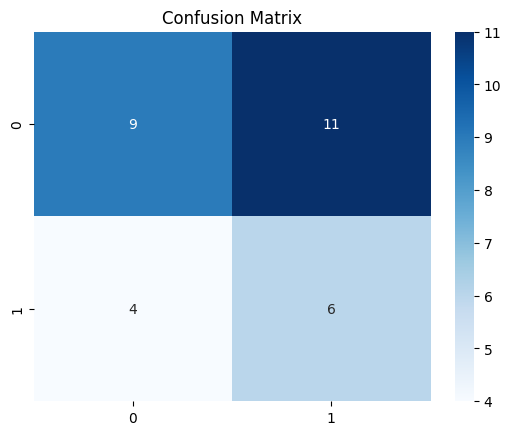

In [27]:
#Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

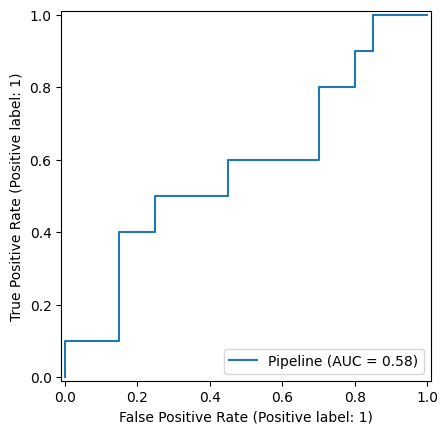

In [28]:
#ROC Curve Visualization
RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
plt.show()

### **13. Key Insight Section (Business Interpretation)**
#### - Churn rate is ~20%: indicates a significant risk of revenue loss.
#### - Customers with short tenure (<12 months) are more likely to churn.
#### - OnlineSecurity, Contract type, and MonthlyCharges are top features driving churn.
#### - Model accuracy is limited (0.50) due to small dataset size and class imbalance.
#### - These insights help prioritize retention strategies for high-risk customers.

### **14. Next Steps / Recommendations**
#### - Explore ensemble models (Random Forest, XGBoost) to improve predictive accuracy.
#### - Feature engineering: create new variables combining tenure and service usage.
#### - Targeted retention campaigns for high-risk segments identified by the model.
#### - Monitor model performance over time to update strategies as customer behavior evolves.
